https://sites.google.com/eng.pdn.ac.lk/freelancingprojects/song-key-detection-algorithm-signal-processing

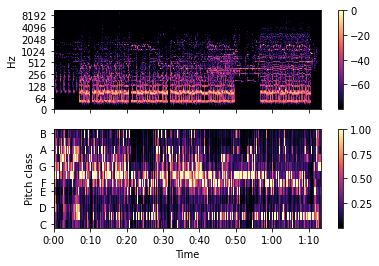

In [99]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
path = "/content/drive/Shareddrives/G-33-2022/Audios/Fully mixed song for us to separate and listen/josh pan,Dylan Brady - The Whistle.wav"
name ="josh pan,Dylan Brady - The Whistle" 

y, sr = librosa.load(path)

#librosa.feature.melspectrogram(y=y, sr=sr)
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [100]:
print(y.shape)
print(chroma.shape)

(3238025,)
(12, 3163)


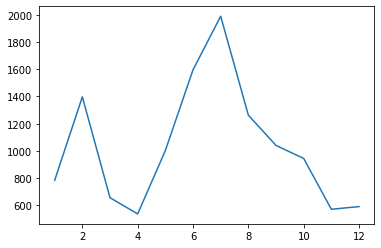

In [101]:
x = np.sum( chroma,1)
index = np.linspace(1,12,12)
D = np.stack((index,x),1)
D=D[D[:,1].argsort()]

plt.plot(index,x)
plt.show()


In [102]:
Notes = D[5:12,0]        #removing the least used 5 notes
print(Notes,'\n')
scales = [[1,3,5,6,8,10,12],
          [2,4,6,7,9,11,1],
          [3,5,7,8,10,12,2],
          [4,6,8,9,11,1,3],
          [5,7,9,10,12,2,4],
          [6,8,10,11,1,3,5],
          [7,9,11,12,2,4,6],
          [8,10,12,1,3,5,7],
          [9,11,1,2,4,6,8],
          [10,12,2,3,5,7,9],
          [11,1,3,4,6,8,10],
          [12,2,4,5,7,9,11]]

matches  = []        
for i in range(12):         #finding the similar scale to the algorithmically obtained scale
  Notes_as_set = set(Notes)
  intersection = Notes_as_set.intersection(scales[i])
  NotesIntersectionScales = list(intersection)
  matches.append(len(NotesIntersectionScales))            #number of matches
  print(NotesIntersectionScales)
  

keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']


max_value = max(matches)
max_index= np.where(np.array(matches)==max_value)

print('\n',matches,'\n') 


[10.  5.  9.  8.  2.  6.  7.] 

[8, 10, 5, 6]
[9, 2, 6, 7]
[2, 5, 7, 8, 10]
[8, 9, 6]
[2, 5, 7, 9, 10]
[8, 10, 5, 6]
[9, 2, 6, 7]
[8, 10, 5, 7]
[8, 9, 2, 6]
[2, 5, 7, 9, 10]
[8, 10, 6]
[9, 2, 5, 7]

 [4, 4, 5, 3, 5, 4, 4, 4, 4, 5, 3, 4] 



In [105]:
def NotesScore(Notes,max_index,scales):
  
  Scores=[]
  for i in max_index : 
    Notes_as_set = set(Notes)
    intersection = Notes_as_set.intersection(scales[i])
    NotesIntersectionScales = list(intersection)
    Notes = list(Notes)
    score = 0
    for j in range(len(NotesIntersectionScales)):
      score = score + 12- Notes.index(NotesIntersectionScales[j])
    Scores.append(score)
  return Scores  

In [106]:
score = NotesScore(Notes,max_index[0],scales)
max_score = max(score)
max_score_index =max_index[0][ ( np.where(np.array(score)==max_score) )[0] ]
KEY_of_the_SONG = np.array(keys)[max_score_index]

print(max_value)
print(max_index[0])
print(max_score_index)
print(name," = ",KEY_of_the_SONG)

5
[2 4 9]
[4 9]
josh pan,Dylan Brady - The Whistle  =  ['E' 'A']


Below is the  prediction vs Correct:

1.Akeboshi - Wind =  D# - D#

2.Ben Matthews - Old Habits  =  C - C

3.Billie Eilish - bury a friend= Gm - A# (Relative major of Gm)

4.Freeweights - Lightweight = C#m and F#m - A (Relative major of F#m)  
(Change the weighting system and you'll get E the relative major of C#m and B)

5.Trouze,Sam Feldt,何维健 - 情非得已 (电音版)= C - C

6.josh pan,Dylan Brady =F#m - 'E' 'A'  (A is relative major of F#m)

Below is the  prediction vs Correct:

1.Akeboshi - Wind =  D# - D#

2.Ben Matthews - Old Habits  =  C - C

3.Billie Eilish - bury a friend= Gm - A# (Relative major of Gm)

4.Freeweights - Lightweight = C#m and F#m - A (Relative major of F#m)  

5.Trouze,Sam Feldt,何维健 - 情非得已 (电音版)= C - C

6.josh pan,Dylan Brady =F#m - 'E' 'A'  (A is relative major of F#m)